# Análise banco TecIMD
    
    Raul Lucena e Silva

### Preparação

In [1]:
# importação da biblioteca Pandas
import pandas as pd

In [2]:
## demais bibliotecas salvas por lembrança

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib notebook

In [2]:
# importação da tabela log
log = pd.read_csv('tb_log_19.csv')

### Checando o Banco carregado e os dados

In [3]:
# verificando as colunas do banco
log.columns

Index(['log_id', 'log_data', 'log_id_usuario', 'log_id_disciplina',
       'log_id_pagina', 'log_acao', 'log_aula_ordenacao', 'log_uniqid',
       'log_scroll', 'log_tempo', 'log_ip', 'log_user_agent'],
      dtype='object')

In [4]:
#verificando o banco
log.head()

,log_id,log_data,log_id_usuario,log_id_disciplina,log_id_pagina,log_acao,log_aula_ordenacao,log_uniqid,log_scroll,log_tempo,log_ip,log_user_agent
0,1,1563297047,6111.0,72,8996.0,visualizar,1,5d2dd06b4a5ae,t,t,10.7.12.88,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:67....
1,2,1563297070,6111.0,72,8997.0,visualizar,1,5d2dd06b4a5ae,t,t,10.7.12.88,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:67....
2,27,1563300295,14466.0,70,8673.0,visualizar,5,5d2e10ea86246,NaN,t,177.154.192.12,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:68.0) ...
3,3,1563297083,6111.0,72,8998.0,visualizar,1,5d2dd06b4a5ae,t,t,10.7.12.88,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:67....
4,14,1563297306,6111.0,72,9008.0,visualizar,1,5d2dd06b4a5ae,t,t,10.7.12.88,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:67....


### Limpando o DataFrame

In [5]:
# Removendo colunas desnecessárias
log.drop(columns=['log_uniqid', 'log_ip', 'log_user_agent'], inplace=True)

# Removendo ação 'exibir', desnescessária
log = log.loc[log.log_acao == 'visualizar']

In [6]:
#removendo ações de log sem scroll e tempo, ou seja, que não há ação alguma na página.
log_c_tempo = log
log = log.loc[(log.log_scroll == 't') | (log.log_tempo == 't')]
log_c_tempo = log_c_tempo.loc[(log_c_tempo.log_tempo == 't')]
log

,log_id,log_data,log_id_usuario,log_id_disciplina,log_id_pagina,log_acao,log_aula_ordenacao,log_scroll,log_tempo
0,1,1563297047,6111.0,72,8996.0,visualizar,1,t,t
1,2,1563297070,6111.0,72,8997.0,visualizar,1,t,t
2,27,1563300295,14466.0,70,8673.0,visualizar,5,NaN,t
3,3,1563297083,6111.0,72,8998.0,visualizar,1,t,t
4,14,1563297306,6111.0,72,9008.0,visualizar,1,t,t
5,4,1563297102,6111.0,72,8999.0,visualizar,1,t,t
6,6,1563297146,6111.0,72,9000.0,visualizar,1,t,t
7,15,1563297316,6111.0,72,9009.0,visualizar,1,t,t
8,7,1563297163,6111.0,72,9001.0,visualizar,1,t,t
9,8,1563297179,6111.0,72,9002.0,visualizar,1,t,t


In [7]:
# Dimensão do banco, linhas e colunas
log.shape

(157339, 9)

In [8]:
log_c_tempo.shape

(100937, 9)

In [9]:
# Tipos de dados do banco
log.dtypes

log_id                  int64
log_data                int64
log_id_usuario        float64
log_id_disciplina       int64
log_id_pagina         float64
log_acao               object
log_aula_ordenacao      int64
log_scroll             object
log_tempo              object
dtype: object

### Conversões

In [10]:
# Convertendo log_data para datetime
log.log_data = pd.to_datetime(log.log_data, unit='s', dayfirst=True)
log_c_tempo.log_data = pd.to_datetime(log_c_tempo.log_data, unit='s', dayfirst=True)

# Convertendoo o tipo de id_usuário para Category
## Para facilitar a cecagem e agrupamento 
log.log_id_usuario = log.log_id_usuario.astype('category')
log.log_id_disciplina = log.log_id_disciplina.astype('category')
log.log_aula_ordenacao = log.log_aula_ordenacao.astype('category')

log_c_tempo.log_id_usuario = log_c_tempo.log_id_usuario.astype('category')
log_c_tempo.log_id_disciplina = log_c_tempo.log_id_disciplina.astype('category')
log_c_tempo.log_aula_ordenacao = log_c_tempo.log_aula_ordenacao.astype('category')

# Checando as mudanças de tipo
log.dtypes
#log_c_tempo.dtypes

log_id                         int64
log_data              datetime64[ns]
log_id_usuario              category
log_id_disciplina           category
log_id_pagina                float64
log_acao                      object
log_aula_ordenacao          category
log_scroll                    object
log_tempo                     object
dtype: object

In [16]:
log.to_csv

<bound method NDFrame.to_csv of         log_id            log_data log_id_usuario log_id_disciplina  \
0            1 2019-07-16 17:10:47         6111.0                72   
1            2 2019-07-16 17:11:10         6111.0                72   
2           27 2019-07-16 18:04:55        14466.0                70   
3            3 2019-07-16 17:11:23         6111.0                72   
4           14 2019-07-16 17:15:06         6111.0                72   
5            4 2019-07-16 17:11:42         6111.0                72   
6            6 2019-07-16 17:12:26         6111.0                72   
7           15 2019-07-16 17:15:16         6111.0                72   
8            7 2019-07-16 17:12:43         6111.0                72   
9            8 2019-07-16 17:12:59         6111.0                72   
10           5 2019-07-16 17:11:49        14261.0                68   
11           9 2019-07-16 17:13:19         6111.0                72   
12          28 2019-07-16 18:05:22        144

In [11]:
# Checando o novo formato de data
log.log_data.head()
#log_c_tempo.log_data.head()

0   2019-07-16 17:10:47
1   2019-07-16 17:11:10
2   2019-07-16 18:04:55
3   2019-07-16 17:11:23
4   2019-07-16 17:15:06
Name: log_data, dtype: datetime64[ns]

In [12]:
# Checando data do primeiro registro
log.log_data.min()

Timestamp('2019-07-16 17:10:47')

In [13]:
# Checando data do últimoo registro
log.log_data.max()

Timestamp('2019-09-05 04:42:54')

In [14]:
# Checando os id_usuários
log.log_id_usuario.head()

0     6111.0
1     6111.0
2    14466.0
3     6111.0
4     6111.0
Name: log_id_usuario, dtype: category
Categories (669, float64): [3.0, 5.0, 579.0, 580.0, ..., 14678.0, 14680.0, 14682.0, 14683.0]

In [15]:
log_c_tempo.log_id_usuario.head()

0     6111.0
1     6111.0
2    14466.0
3     6111.0
4     6111.0
Name: log_id_usuario, dtype: category
Categories (660, float64): [3.0, 5.0, 579.0, 580.0, ..., 14678.0, 14680.0, 14682.0, 14683.0]

In [16]:
# Verificando os dados de log_id_usuario
## : Linhas, valores únicos, o que mais aparece e frequencia do mesmo
log.log_id_usuario.describe()

count     157339.0
unique       669.0
top        14065.0
freq        1432.0
Name: log_id_usuario, dtype: float64

In [17]:
# Verificando os dados de log_id_usuario
## : Linhas, valores únicos, o que mais aparece e frequencia do mesmo
log_c_tempo.log_id_usuario.describe()

count     100937.0
unique       660.0
top        14065.0
freq        1079.0
Name: log_id_usuario, dtype: float64

In [18]:
log.log_id_disciplina.describe()

count     157339
unique        48
top            7
freq       67156
Name: log_id_disciplina, dtype: int64

In [19]:
log_c_tempo.log_id_disciplina.describe()

count     100937
unique        48
top            7
freq       40899
Name: log_id_disciplina, dtype: int64

### Minerando informações

In [20]:
# Quantidade de disciplinas unicas
log.log_id_disciplina.nunique()

48

In [35]:
log[log.log_id_disciplina == 1]

,log_id,log_data,log_id_usuario,log_id_disciplina,log_id_pagina,log_acao,log_aula_ordenacao,log_scroll,log_tempo
99738,99671,2019-08-15 10:24:27,11620.0,1,5014.0,visualizar,4,t,NaN
99739,99670,2019-08-15 10:24:25,11620.0,1,5010.0,visualizar,4,t,NaN
125079,125033,2019-08-21 14:11:53,13639.0,1,4980.0,visualizar,2,t,NaN
125080,125034,2019-08-21 14:11:56,13639.0,1,4994.0,visualizar,2,t,NaN
125081,125035,2019-08-21 14:11:57,13639.0,1,4993.0,visualizar,2,t,t


In [372]:
# Quantidade de log com scroll
log.log_scroll.count() #.value_counts()

1064703

In [376]:
# Quantidade de log com scroll
log_c_tempo.log_scroll.count() #.value_counts()

691598

In [373]:
# Quantidade de log com tempo
log.log_tempo.count() #.value_counts()

853475

In [377]:
# Quantidade de log com tempo
log_c_tempo.log_tempo.count() #.value_counts()

853475

In [374]:
# Quantidade de log com scroll & tempo
log[(log.log_scroll == 't') & (log.log_tempo == 't')].shape

(691598, 9)

In [379]:
# Quantidade de log com scroll & tempo
log_c_tempo[(log_c_tempo.log_scroll == 't') & (log_c_tempo.log_tempo == 't')].shape

(691598, 9)

In [169]:
# Quantidade de disciplinas
log.log_id_disciplina.nunique()

48

In [380]:
# Quantidade de disciplinas
log_c_tempo.log_id_disciplina.nunique()

48

In [417]:
log.log_uniqid.value_counts().describe()

count    116205.000000
mean         10.555312
std          12.467082
min           1.000000
25%           3.000000
50%           7.000000
75%          14.000000
max         801.000000
Name: log_uniqid, dtype: float64

In [426]:
sessoes = log.log_uniqid.value_counts()
sessoesDF = pd.DataFrame(sessoes)
sessoesDF[sessoesDF.log_uniqid <=3].count()

log_uniqid    35845
dtype: int64

In [171]:
log.log_id_disciplina.value_counts()

12    109541
15     86614
7      86608
13     78167
16     77688
11     62336
8      61390
57     43217
14     41359
62     39918
51     39766
46     39753
19     39244
45     36999
10     35005
6      33804
56     32146
21     24835
67     21130
54     20791
9      20006
66     19985
47     18847
17     16014
20     11461
52     11234
49     10749
50     10553
59     10408
58      9607
44      9400
61      7448
68      5944
63      5823
64      5740
53      5372
1       4620
4       4594
18      4285
69      3872
65      3797
48      3691
2       3210
55      2990
3       2762
60      2563
28       661
29       633
Name: log_id_disciplina, dtype: int64

In [381]:
log_c_tempo.log_id_disciplina.value_counts()

12    76621
15    61760
7     55506
16    53439
13    51687
11    41764
8     41209
57    30611
62    29467
51    27829
46    27800
14    27591
10    26689
19    26116
45    24649
56    23353
6     22847
21    16561
67    16507
54    15431
66    14742
9     14567
47    13143
17    10058
52     8428
50     8289
59     7662
20     7460
49     7415
44     7241
58     7118
61     5619
68     4362
63     4171
64     4122
53     4030
1      3787
4      3400
18     3300
69     3045
65     2606
2      2486
48     2307
55     2286
3      2079
60     1874
28      229
29      212
Name: log_id_disciplina, dtype: int64

In [172]:
# Ocorrências de cada usuário
log.log_id_usuario.value_counts() #.head()

11340.0    5739
11331.0    4367
11278.0    3875
11313.0    3691
12350.0    3533
11602.0    3513
11942.0    3484
12116.0    3454
12899.0    3443
12204.0    3290
13492.0    3282
13710.0    3245
11714.0    3194
12135.0    3188
13524.0    3154
12788.0    3113
12450.0    3003
12709.0    2961
12200.0    2925
11874.0    2837
13385.0    2750
13259.0    2692
13515.0    2680
12580.0    2671
12210.0    2649
12018.0    2648
11669.0    2580
12087.0    2569
13125.0    2565
12052.0    2553
           ... 
10446.0       1
8466.0        1
10891.0       1
10752.0       1
8881.0        1
8793.0        1
13975.0       1
11284.0       1
10278.0       1
5083.0        1
13599.0       1
11905.0       1
9906.0        1
9912.0        1
7184.0        1
9836.0        1
6621.0        1
12494.0       1
13846.0       1
11187.0       1
13699.0       1
6287.0        1
9660.0        1
12033.0       1
13462.0       1
12602.0       1
11359.0       1
9461.0        1
9867.0        1
9357.0        1
Name: log_id_usuario, Le

In [382]:
# Ocorrências de cada usuário
log_c_tempo.log_id_usuario.value_counts() #.head()

11340.0    4380
11278.0    3548
11331.0    3334
12135.0    2996
13524.0    2701
11874.0    2695
12350.0    2670
12788.0    2646
11313.0    2491
11942.0    2461
12018.0    2368
13710.0    2323
12580.0    2314
12450.0    2287
11600.0    2283
13125.0    2231
11402.0    2210
11456.0    2195
11669.0    2170
12200.0    2166
13492.0    2100
13916.0    2095
12641.0    2080
11941.0    2064
11714.0    2032
13878.0    2011
13501.0    2002
12210.0    1998
12484.0    1952
12278.0    1932
           ... 
13599.0       1
8466.0        1
12602.0       1
11964.0       1
9836.0        1
8719.0        1
8843.0        1
8908.0        1
8213.0        1
8153.0        1
9357.0        1
9461.0        1
9660.0        1
9678.0        1
9786.0        1
11847.0       1
9865.0        1
10891.0       1
9867.0        1
9900.0        1
9906.0        1
10294.0       1
7184.0        1
12494.0       1
10440.0       1
10446.0       1
11905.0       1
6198.0        1
13699.0       1
10346.0       1
Name: log_id_usuario, Le

In [383]:
log[log.log_id_usuario == 9357.0]

,log_id,log_data,log_id_usuario,log_id_disciplina,log_id_pagina,log_acao,log_aula_ordenacao,log_scroll,log_tempo
1283760,1283546,2018-05-29 23:33:49,9357.0,14,20.0,visualizar,2,NaN,t


In [429]:
arr = log.log_id_usuario.value_counts()
newlog = pd.DataFrame(data=arr)
#newlog[newlog.log_id_usuario > 477].plot(kind='area')
newlog.describe()
#newlog[newlog.log_id_usuario > 1059]

,log_id_usuario
count,1831.000000
mean,669.896232
std,682.870678
min,1.000000
25%,109.500000
50%,477.000000
75%,1059.000000
max,5739.000000


In [439]:
arr2 = log_c_tempo.log_id_usuario.value_counts()
newlogT = pd.DataFrame(data=arr2)
#newlog[newlog.log_id_usuario > 477].plot(kind='area')
newlogT.describe()
#newlogT[newlogT.log_id_usuario < 76] #.count()

,log_id_usuario
count,1806.000000
mean,472.577519
std,505.616037
min,1.000000
25%,76.000000
50%,317.000000
75%,710.750000
max,4380.000000


In [385]:
#newlog[newlog.log_id_usuario < 110].count()
newlog[newlog.log_id_usuario == 633].count()

log_id_usuario    1
dtype: int64

In [386]:
arr_disciplinas = log.log_id_disciplina.value_counts()
log_disciplinas = pd.DataFrame(data=arr_disciplinas)
#newlog[newlog.log_id_usuario > 477].plot(kind='area')
log_disciplinas.describe()
#newlog[newlog.log_id_usuario > 1059]

,log_id_disciplina
count,48.000000
mean,25553.750000
std,26938.527906
min,633.000000
25%,5184.000000
50%,13737.500000
75%,39371.250000
max,109541.000000


In [303]:
log_disciplinas[log_disciplinas.log_id_disciplina == 633].count()

log_id_disciplina    1
dtype: int64

In [347]:
#tempo = log.loc[(log.log_tempo == 't')]
log = log.loc[log.log_tempo == 't']
array = log['log_id_usuario'].value_counts()
tempo = pd.DataFrame(array)
tempo.shape()
#tempo.dtypes() #.describe() #.log_id_usuario.value_counts()

TypeError: 'tuple' object is not callable

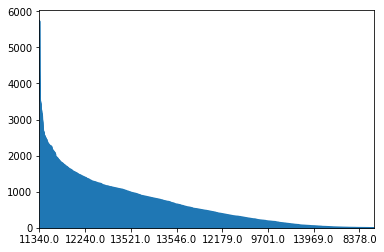

In [71]:
# Ocorrências de cada usuário
log.log_id_usuario.value_counts().plot(kind='area') #.head()

In [255]:
# Array com valores dos id_usuarios unicos
log.log_id_usuario.unique()

[11955.0, 12145.0, 12603.0, 12905.0, 12419.0, ..., 11530.0, 4035.0, 8378.0, 11065.0, 12602.0]
Length: 1831
Categories (1831, float64): [11955.0, 12145.0, 12603.0, 12905.0, ..., 4035.0, 8378.0, 11065.0, 12602.0]

In [257]:
#top       11340.0
#freq         6975
log[(log.log_id_usuario == 11340.0)].count()
#log[(log.log_id_usuario == '10218.0')].count()

log_id                5739
log_data              5739
log_id_usuario        5739
log_id_disciplina     5739
log_id_pagina         5739
log_acao              5739
log_aula_ordenacao    5739
log_scroll            4309
log_tempo             4380
dtype: int64

In [258]:
# Comparando id_usuario X log_acao
pd.crosstab(log.log_id_usuario, log.log_acao)

log_acao,visualizar
log_id_usuario,
3.0,457
5.0,67
579.0,1533
580.0,1062
585.0,9
598.0,19
843.0,190
927.0,1
1117.0,145


<IPython.core.display.Javascript object>


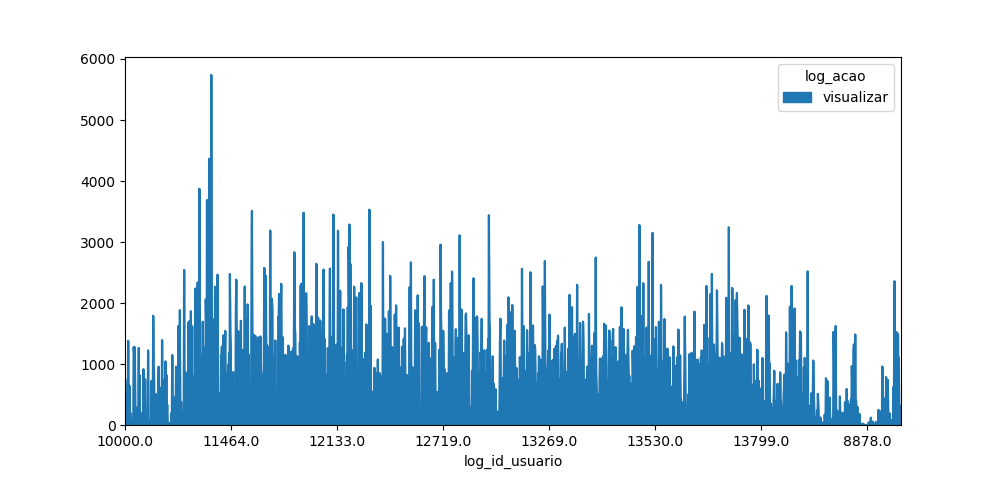

In [72]:
# Comparando id_usuario X log_acao
pd.crosstab(log.log_id_usuario, log.log_acao).plot(kind='area')

In [78]:
# Comparando id_usuario X id_disciplina
pd.crosstab(log.log_id_usuario, log.log_id_disciplina)

log_id_disciplina,1,2,3,4,6,7,8,9,10,11,...,60,61,62,63,64,65,66,67,68,69
log_id_usuario,,,,,,,,,,,,,,,,,,,,,
10000.0,143,95,79,127,0,0,0,0,0,0,...,0,0,0,0,0,93,0,0,132,88
10014.0,0,0,0,0,0,3,0,0,0,0,...,0,65,0,0,0,0,0,0,0,0
10018.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10028.0,0,0,0,0,0,0,0,0,0,0,...,7,0,0,11,0,0,0,0,0,0
10048.0,0,0,0,0,0,43,252,0,112,0,...,0,0,0,0,0,0,91,0,0,0
10072.0,0,0,0,0,0,1,0,0,0,0,...,0,0,93,0,0,0,0,53,0,0
10080.0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10084.0,0,0,0,0,0,0,0,0,0,0,...,0,0,232,0,0,0,0,125,0,0
10091.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


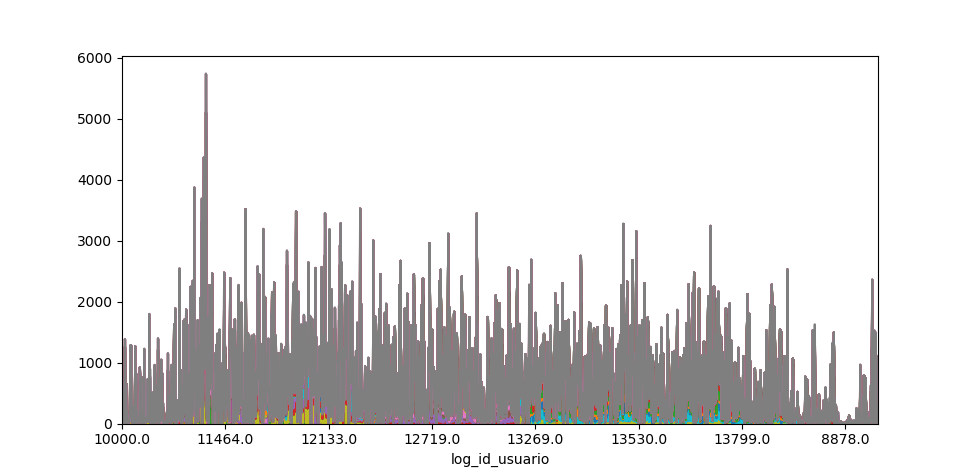

In [94]:
# Comparando id_usuario X id_disciplina
pd.crosstab(log.log_id_usuario, log.log_id_disciplina).plot(kind='area', legend=None)

In [109]:
# Comparando id_usuario X id_disciplina
## Exibindo sem 0s
log.groupby('log_id_usuario').log_id_disciplina.unique() #.value_counts()

log_id_usuario
10000.0                             [4, 2, 1, 65, 69, 68, 3]
10014.0                          [28, 20, 61, 29, 17, 7, 49]
10018.0                                             [45, 46]
10028.0                     [47, 52, 48, 60, 28, 63, 58, 53]
10048.0                       [7, 18, 10, 29, 8, 66, 46, 45]
10072.0                  [56, 51, 57, 62, 67, 13, 7, 21, 19]
10080.0                                                  [6]
10084.0                     [13, 56, 51, 57, 19, 21, 67, 62]
10091.0                                             [46, 54]
10102.0                                             [10, 46]
10130.0                                [6, 7, 8, 17, 20, 14]
10150.0                                                 [12]
10157.0                                         [45, 29, 46]
10167.0                                              [7, 17]
10171.0                                                  [9]
10196.0                                         [59, 18, 65]
10204.0  

In [111]:
# Comparando id_usuario X id_disciplina
## Exibindo sem 0s
log.groupby('log_id_usuario').log_id_disciplina.value_counts()

log_id_usuario  log_id_disciplina
10000.0         1                    143
                68                   132
                4                    127
                2                     95
                65                    93
                69                    88
                3                     79
10014.0         61                    65
                49                    62
                20                    20
                29                    19
                17                    15
                7                      3
                28                     2
10018.0         45                   186
                46                   123
10028.0         47                    82
                52                    82
                48                    30
                58                    15
                63                    11
                53                    10
                60                     7
                28     

Com isso, bem a grosso modo ainda, vejo que a maioria dos alunos nem acessam todas as disciplinas;

Eles usam mesmo o sistema?

Faz sentido pra eles?

Utilizam offline? (Compartilhando?)

In [112]:
log.head()

,log_id,log_data,log_id_usuario,log_id_disciplina,log_id_pagina,log_acao,log_aula_ordenacao,log_scroll,log_tempo
0,17,2018-01-26 20:21:34,11955.0,12,1943.0,visualizar,6,t,t
1,1,2018-01-26 20:10:52,12145.0,57,3391.0,visualizar,1,t,t
2,11,2018-01-26 20:16:34,12603.0,7,7207.0,visualizar,1,t,t
3,22,2018-01-26 20:24:55,12145.0,57,3396.0,visualizar,1,t,t
4,18,2018-01-26 20:21:36,12905.0,10,4534.0,visualizar,1,t,t


In [121]:
df = log.groupby(by='log_id_usuario')
df.sum().unstack().plot() #.groupby(by="log_id_disciplina").count()

In [21]:
#log.plot.scatter('log_id_usuario', 'log_id_disciplina')
#t = pd.crosstab(log.log_id_usuario, log.log_id_disciplina)
#t.plot.scatter('log_id_usuario', 'log_id_disciplina')

In [29]:
by_usuarios_disciplina = log.groupby(['log_id_usuario', 'log_id_disciplina'])

<IPython.core.display.Javascript object>


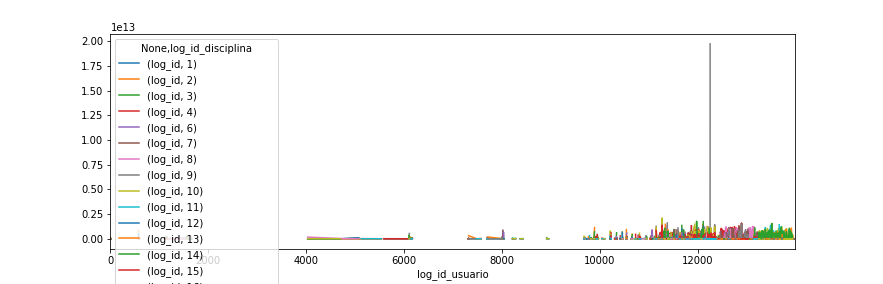

In [57]:
by_usuarios_disciplina.sum().unstack().plot()

In [19]:
# ax = sb.scatterplot(x='log_id_usuario', y='log_id_disciplina', data=log.T)

<IPython.core.display.Javascript object>


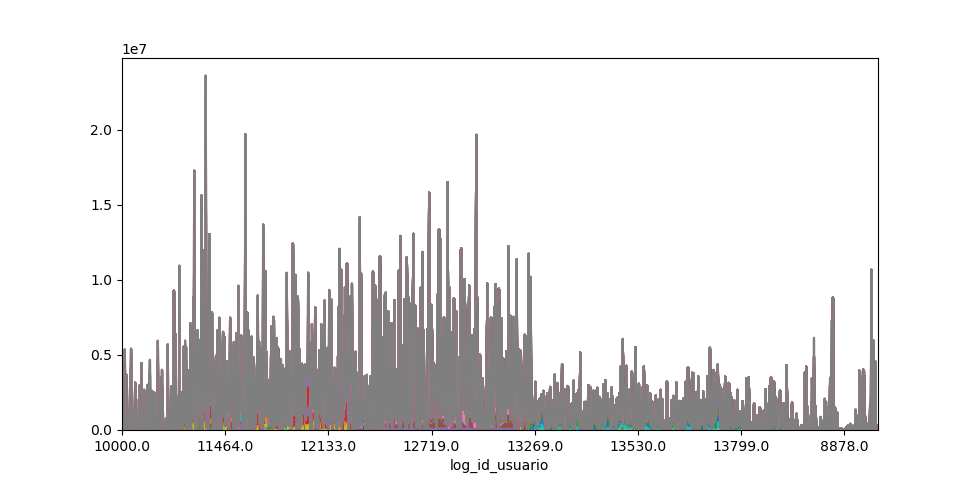

In [127]:
log.groupby(['log_id_usuario', 'log_id_disciplina'])['log_id_pagina'].sum().unstack().plot(kind='area', legend=False)

In [134]:
#pd.pivot_table(log, index="log_id_usuario", columns="log_id_disciplina", aggfunc=np.sum)

In [140]:
# Contagem de acesso em páginas de cada disciplina de cada usuário
log.groupby(['log_id_usuario', 'log_id_disciplina']).log_id_pagina.count()

log_id_usuario  log_id_disciplina
10000.0         1                    143
                2                     95
                3                     79
                4                    127
                65                    93
                68                   132
                69                    88
10014.0         7                      3
                17                    15
                20                    20
                28                     2
                29                    19
                49                    62
                61                    65
10018.0         45                   186
                46                   123
10028.0         28                     4
                47                    82
                48                    30
                52                    82
                53                    10
                58                    15
                60                     7
                63     